# TITLE   TITLE   TITLE

## Contents
* [Introduction](#intro)
* [Sampling images and plotting](#visual)
* [Theory behind methods](#method)
* [](#)
* [](#)
* [](#)
* [](#)
* [](#)
* [Denoising](#denoising)
* [Conclusion](#conclusion)

## Introduction <a class="anchor" id="intro"></a>

INSERT intro her

## Sampling images and plotting <a class="anchor" id="visual"></a>

We begin by importing necessary libraries.

In [1]:
## Libraries for math and plotting
import numpy as np
import matplotlib.pyplot as plt

## Image handling, files, timing and status bar
# %pip install opencv-python # Required to import cv2 !!!
import cv2
import os
import time
import random
from tqdm.notebook import tqdm

The dataset for this project consists of 10 000 images. Of these we will sample $N=XXXX$ random images. We use a predeterminded seed to ensure the results won't change if the notebook is restarted. 

In [2]:
def load_images(N, seed = 4269):
    """
    Loads N random images from cryptopunk dataset. Use the same seed to get the same
    selection each time. 
    Input:
        integer: N, number of images to load
        integer: seed for random sampling
    Output:
        array: faces, (24,24,4,N) numpy array containing images
    """
    # Allocate array to store images
    faces = np.zeros((24,24,4,N))

    # Chose N random image numbers
    M = 10000 # number of images to choose from
    np.random.seed(seed)
    image_number_choice = np.random.choice(np.arange(0, M),N, replace = False)
        
    # Iterate over folders
    for i in range(len(image_number_choice)):
        im_path = f"./imgs/imgs/imgs/{image_number_choice[i]}.png"
        im = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)
        faces[:,:,:,i] = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)/255.0

    return faces

# Number of faces to keep in final array
N = 500

# Load N faces
faces = load_images(N)

# Check that the shape is correct
print(faces.shape)

(24, 24, 4, 500)


In [3]:
# Code for plotting images
def plotimgs(imgs, nplot = 8, rescale = False, filename = None):
    """
    Plots nplot*nplot images on an nplot x nplot grid. 
    Saves to given filename if filename is given
    Can also rescale the RGB channels
    input:
        imgs: (24,24,4,N) or (24,24,3,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
        rescale: bool
        filename: string, figure will be saved to this location. Should end with ".png".
    """
    # We will change some of the parameters of matplotlib, so we store the initial ones
    oldparams = plt.rcParams['figure.figsize']

    # New params to make better plot. There definitely exists better ways of doing this
    plt.rcParams['figure.figsize'] = (16, 16)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgrey")

    # Iterate over images
    for idx in range(nplot**2):
        
        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        # Rescale RGB channels by dividing my maximal value
        if rescale:
            scaled_img = np.copy(imgs[:,:,:,idx])
            scaled_img[:,:,:3] = scaled_img[:,:,:3]/np.max(scaled_img[:,:,:3])
            axes[i,j].imshow(scaled_img)
        else:
            axes[i,j].imshow(imgs[:,:,:,idx])
    
    # Tight layout so images will appear closer together
    plt.tight_layout()

    # Save if filename is given
    if filename is not None:
        plt.savefig(filename)

    plt.show()

    # Return to old parameters
    plt.rcParams['figure.figsize'] = oldparams


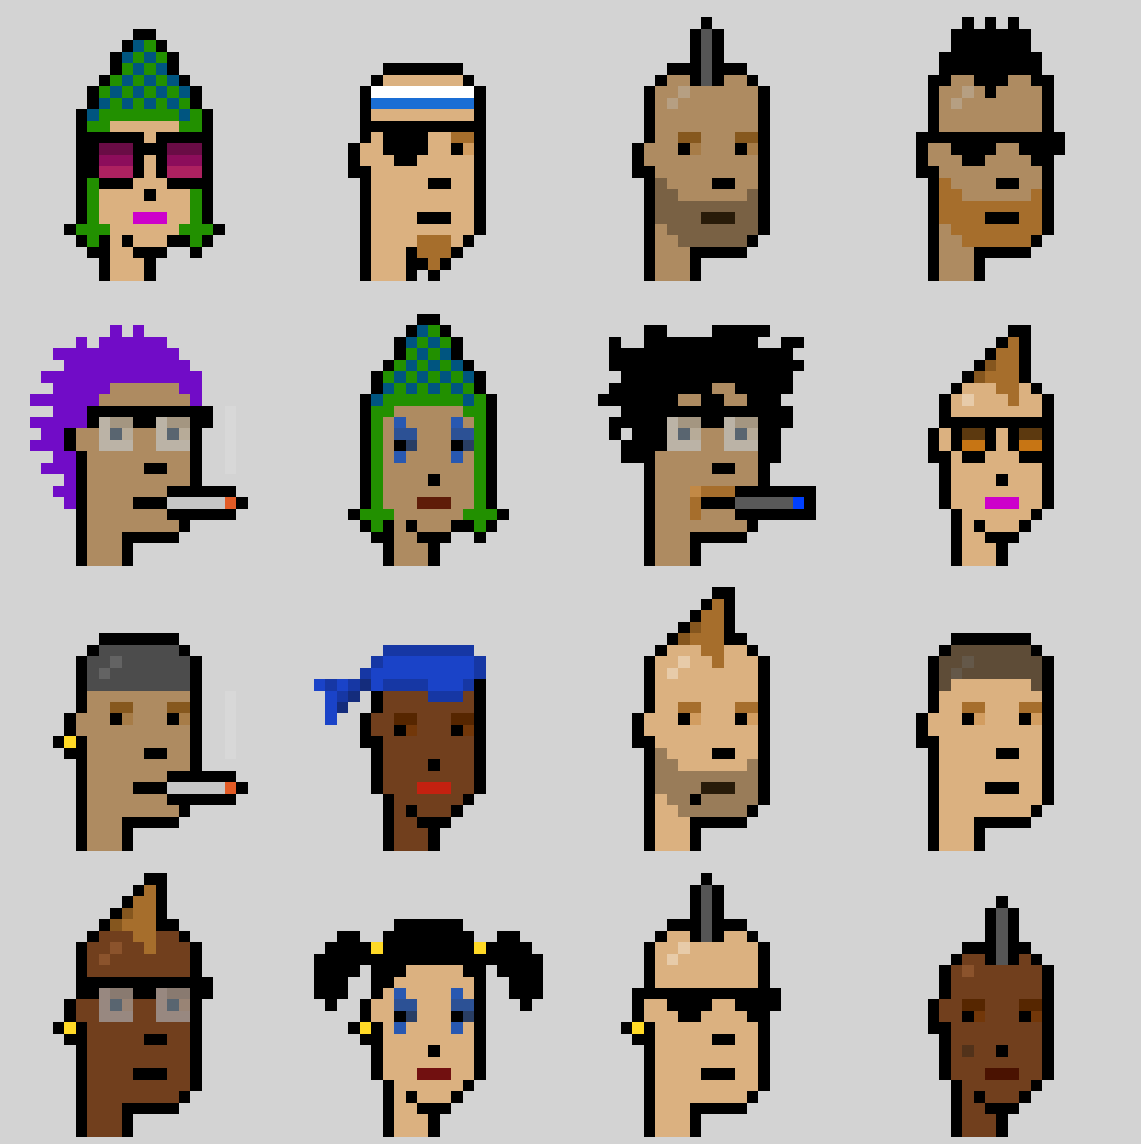

In [14]:
# Example of plotting 8 times 8 images stored in "faces" and saving the output to a file named "punks.png"
plotimgs(faces, 4, filename="punks.png")

Under er noe dere egentlig kan gjøre dere vil, men her viser vi hvordan dere kan splitte fargekanalene fra opasitetskanalen, samt reshape slik at dere har en array som dere kan anvende NMF på. 

In [5]:
# Split the images into opacity and rgb channels
faces_opacity = faces[:,:,3,:]
faces_rgb = faces[:,:,:3,:]
shape = faces_rgb.shape

# Clever reshape "trick". This is the matrix we will apply the NMF to
faces_reshaped = faces_rgb.reshape(np.prod(shape)//N, N)


## Theory behind methods <a class="anchor" id="method"></a>

<h2> NMF-algoritmen </h2>
Under er en mal for hva en NMF funksjon burde ta inn og spytte ut. Merk at dere må fylle inn, akkurat nå kræsjer den.

## TASK 1

**SUGGESTION: we present the method/algorithm here and do the tasks a-c before implementation.**

present\
\
\
\
\

present

a) vise blabla
\
\
\
\


b) vise blabla
\
\
\
\


c) vise blabla
\
\
\
\\


We now implement ...

Study the matrices:

$$INSERT$$

In [12]:
A1 = np.array([[1, 0],
               [0, 1]], dtype = "float")

A2 = np.array([[1, 2],
               [1, 1],
               [1, 2]], dtype = "float")

A3 = np.array([[2, 1, 1],
               [2, 1, 1],
               [1, 1, 2]], dtype = "float")

A4 = np.array([[2, 1, 0],
               [1, 2, 3],
               [0, 3, 3]], dtype = "float")

In [6]:
#e
#f extend to store frobenius norm

def NMF(V, d, delta = 1e-9, maxiter = 1000, seed = 0):
    """
    ((Skriv en forklaring på hva funksjonen gjør her))
    input:
        V: (m,n) input array
        d: integer, Number of components we want to decompose V into
        delta, float, small number for safe division
        maxiter: integer, maximum number of iterations
        seed: integer, random seed
    output:
        W: (m,d) array
        H: (d,n) array
    """

    if seed != 0:
        np.random.seed(seed)
    """
    FYLL INN
    """
    return W, H

In [ ]:
#e

e

In [ ]:
#f FIND ranks

In [ ]:
#g

"""
g) For A3 and A4, run the NMF algorithm for d = 1, d = 2 and d = 3 and
plot ∥A − WkHk∥F as a function of number of iterations in two separate plots
(one for A3 and one for A4). Scale the y-axis logarithmically, using for example
plt.semilogy. Is equation (17) satisfied? How do the results depend on d?
"""

## TASK 2

## Denoising <a class="anchor" id="denoising"></a>

We will now add noise ...

We model the noise as:

Below is the function ...

In [7]:
def add_noise(imgs_reshaped, sigma = 0.1):
    """
    Adds gaussian noise to images as described in text.
    Note that imgs must be given as a (24*24*3, N) numpy array, i.e the reshaped images
    Input:
        imgs_reshaped: (1728,N) numpy array
        sigma: scalar, noise level
    Output:
        noisy_faces: (1728,N) numpy array containing noisy images
    """
    # Noise level
    sigma = 0.1

    # Array that will store the rgb channels of the noisy images
    noisy_faces = np.copy(imgs_reshaped)

    # Number of noisy values we need
    nnzero = faces_reshaped[np.nonzero(imgs_reshaped)].shape[0]

    # Sample noisy values and add noise
    noise = np.random.normal(0.0,1,nnzero)
    noisy_faces[np.nonzero(imgs_reshaped)] += sigma*noise

    # Clip to lie between 0 and 1 so that we can still interpret them as images
    noisy_faces = np.maximum(0.0,np.minimum(1.0, noisy_faces))

    return noisy_faces



Vi kan nå legge til støy til bildene våre, legge på opasitetskanalaen igjen og plotte. Dere må gjøre noe lignende etter dere har anvendt NMF og ønsker å plotte rekonstruksjoner med opasitet.

42.08823696789084


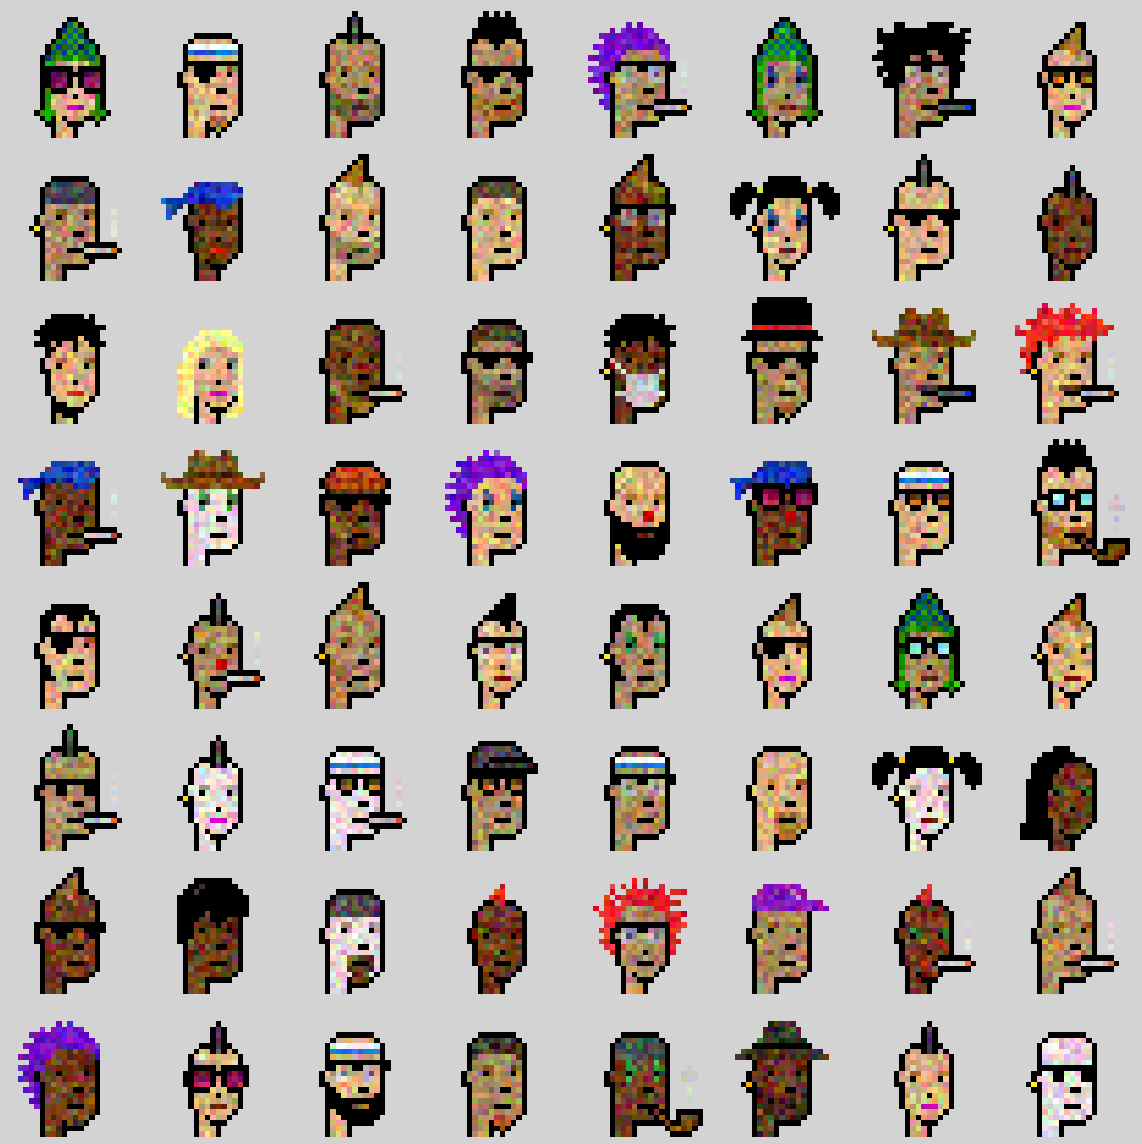

In [8]:
noisy_faces = add_noise(faces_reshaped)

# Calculate the error of the noisy images
noise_residual = np.linalg.norm(noisy_faces - faces_reshaped)
print(noise_residual)

# For plotting noisy images we add the opacity
noisy_faces_with_opacity = np.zeros(faces.shape)
noisy_faces_with_opacity[:,:,:3,:] = noisy_faces.reshape(faces_rgb.shape)
noisy_faces_with_opacity[:,:,3,:] = faces_opacity
plotimgs(noisy_faces_with_opacity)

## Conclusion <a class="anchor" id="conclusion"></a>